In [1]:
#Importing dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Load the CSV file
csv_file_path = 'Resources/Fatalities_May2024.csv'

# Read the CSV file, specifying the header row
df_fatalities = pd.read_csv(csv_file_path, header = 4, low_memory = False)

# Display the head of the DataFrame
df_fatalities.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20241101,NSW,5,2024,Friday,09:20,Single,No,No,Yes,...,40,Inner Regional Australia,Central West,Orange,Arterial Road,No,No,40_to_64,Weekday,Day
1,20243094,Qld,5,2024,Friday,14:00,Multiple,No,No,No,...,54,Inner Regional Australia,Darling Downs - Maranoa,Toowoomba,Sub-arterial Road,No,No,40_to_64,Weekday,Day
2,20244003,SA,5,2024,Friday,14:10,Single,No,No,No,...,63,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Day
3,20244003,SA,5,2024,Friday,14:10,Single,No,No,No,...,67,NaN,NaN,NaN,NaN,No,No,65_to_74,Weekday,Day
4,20241058,NSW,5,2024,Friday,15:30,Single,No,No,No,...,87,Major Cities of Australia,Sydney - Parramatta,Parramatta,Arterial Road,No,No,75_or_older,Weekday,Day


In [3]:
df_fatalities_clean = df_fatalities.copy()

In [4]:
# Removing the incomplete data for the year 2024
# Keeping only the data up to the most recent complete year, which is 2023
df_fatalities_clean = df_fatalities.loc[df_fatalities['Year'] != 2024]

# Displaying the cleaned DataFrame
df_fatalities_clean

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
538,20234021,SA,12,2023,Friday,01:42,Single,No,No,No,...,37,Major Cities of Australia,Adelaide - North,Salisbury,Collector Road,Yes,No,26_to_39,Weekday,Unknown
539,20234018,SA,12,2023,Friday,04:15,Single,No,No,No,...,37,Major Cities of Australia,Adelaide - North,Playford,Sub-arterial Road,No,No,26_to_39,Weekday,Unknown
540,20233014,Qld,12,2023,Friday,06:00,Multiple,No,No,Yes,...,43,Inner Regional Australia,Ipswich,Lockyer Valley,National or State Highway,No,No,40_to_64,Weekday,Day
541,20236025,Tas,12,2023,Friday,09:07,Multiple,No,No,No,...,42,Outer Regional Australia,West and North West,Waratah-Wynyard,National or State Highway,No,No,40_to_64,Weekday,Day
542,20233091,Qld,12,2023,Friday,12:00,Single,No,No,No,...,74,Outer Regional Australia,Darling Downs - Maranoa,Southern Downs,Collector Road,No,No,65_to_74,Weekday,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56120,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,11,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Unknown
56121,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,13,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Unknown
56122,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,13,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Unknown
56123,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,-9,Yes,...,13,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Unknown


In [5]:
df_fatalities_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55587 entries, 538 to 56124
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       55587 non-null  int64 
 1   State                          55587 non-null  object
 2   Month                          55587 non-null  int64 
 3   Year                           55587 non-null  int64 
 4   Dayweek                        55587 non-null  object
 5   Time                           55546 non-null  object
 6   Crash Type                     55587 non-null  object
 7   Bus Involvement                55586 non-null  object
 8   Heavy Rigid Truck Involvement  55586 non-null  object
 9   Articulated Truck Involvement  55586 non-null  object
 10  Speed Limit                    55587 non-null  object
 11  Road User                      55587 non-null  object
 12  Gender                         55587 non-null  object
 13  Age 

In [6]:
df_fatalities_clean['State'].unique()

array(['SA', 'Qld', 'Tas', 'WA', 'NSW', 'Vic', 'NT', 'ACT'], dtype=object)

### Question 1: What is the general trend for road fatalities in Australia over the past 35 years?

In [7]:
# Assuming df_fatalities_clean is the DataFrame with the cleaned data up to 2023
# Group by 'Year' and count the number of crashes
yearly_crashes = df_fatalities_clean.groupby('Year')['Crash ID'].count().reset_index()
yearly_crashes.rename(columns={'Crash ID': 'Total Crashes'}, inplace=True)

# Display the aggregated data
yearly_crashes

,Year,Total Crashes
0,1989,2800
1,1990,2331
2,1991,2113
3,1992,1974
4,1993,1953
5,1994,1928
6,1995,2017
7,1996,1970
8,1997,1767
9,1998,1755


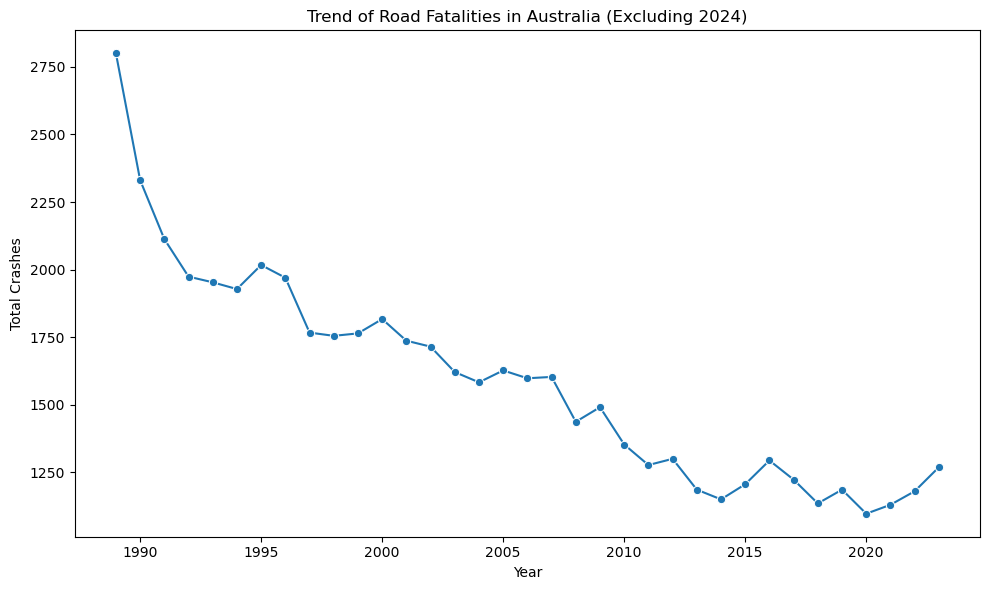

,Year,Total Crashes
count,35.000000,35.000000
mean,2006.000000,1588.200000
std,10.246951,394.113137
min,1989.000000,1097.000000
25%,1997.500000,1246.000000
50%,2006.000000,1598.000000
75%,2014.500000,1792.000000
max,2023.000000,2800.000000


In [8]:
# Plotting the trend of crashes over the past 35 years
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_crashes, x='Year', y='Total Crashes', marker='o')
plt.title('Trend of Road Fatalities in Australia (Excluding 2024)')
plt.xlabel('Year')
plt.ylabel('Total Crashes')
plt.tight_layout()
plt.show()

# Summary statistics
yearly_crashes.describe()

The graph shows the trend of total road crashes in Australia from 1989 to 2023, with a clear overall downward trend in the number of crashes. Below is a detailed summary and analysis based on the visualisation:

1. Significant Decrease in Road Crashes Over Time:
- In 1989, there were approximately 2800 crashes per year.
- By 2023, this number has decreased to about 1269 crashes, representing a reduction of over 50% in road crashes during the 35-year period.
- The most substantial reduction occurred between 1989 and 1992, where crashes dropped from 2800 to 1974.

2. Fluctuations in Decline:
- The overall trend is downward, but there are periods of stability and slight increases:
    - After the sharp decline between 1989 and 1992, crashes stabilised around 1900-2000 crashes per year between 1992 and 1997.
    - From 1998 to 2010, there was a continued decrease in crashes, with numbers dropping from 1755 in 1998 to a low of 1277 in 2011.
    - Post-2011, crashes continued to decline, reaching a low of 1097 crashes in 2020.
- After 2020, there was a slight uptick in crashes, rising to 1269 in 2023.

3. Implications of the Decline:
- The consistent reduction in road crashes can likely be attributed to several factors:
    - Improved road safety measures: Better road infrastructure, stricter traffic law enforcement, and increased awareness of road safety likely contributed to this reduction.
    - Technological Advances: The development of safer vehicle technologies (such as airbags, anti-lock braking systems, and electronic stability control) likely played a significant role.
    - Government intervention: Policies such as lower speed limits, mandatory seatbelt usage, and zero-tolerance for drink-driving helped reduce crashes.

4. Recent Stability and Slight Uptick:
- In the years between 2020 and 2023, there was a slight rise in the number of crashes, increasing from 1097 crashes in 2020 to 1269 in 2023.
- This recent increase could be due to the rebound effect post-pandemic, as more vehicles returned to the road following COVID-19 restrictions. It may also be driven by new factors such as distractions from mobile devices or other technological impacts.

Summary
- The data show that road safety in Australia has significantly improved over the last 30 years, with crashes decreasing by over 50%, from 2800 in 1989 to 1269 in 2023.
- While much of this reduction can be attributed to advancements in safety technology, better driver education, and stronger laws, the slight rise in recent years warrants further investigation.

Statistical Insights

- Time Series Analysis: The long-term downward trend suggests that safety measures have had a substantial positive impact in reducing crashes.
- Comparison: Comparing the peak crash periods of the early 1990s with the most recent years highlights a dramatic improvement in road safety.
- Correlation: Further analysis could explore the relationship between crash trends and external factors, such as changes in vehicle technology, traffic enforcement policies, or driver behavior over the years.

Key Statistics:

1. Mean (Average) Crashes per Year:
- The average number of crashes per year over the 35-year period is 1588.2 crashes.
- This number reflects the overall downward trend, with years before 2000 contributing higher numbers, and the more recent years (2020-2023) having fewer crashes.

2. Standard Deviation (394.1):
- The relatively large standard deviation of 394.1 indicates that there has been significant variability in the yearly crash totals over time. This aligns with the observed fluctuations in the data, especially the rapid decline in the early 1990s and the more recent stability and uptick.

3. Min and Max Crashes:
- The maximum number of crashes occurred in 1989, with 2800 crashes, while the minimum number occurred in 2020, with 1097 crashes. This reinforces the dramatic reduction in crashes over time, showing a significant improvement in road safety efforts.

4. Quartiles (25th, 50th, 75th Percentile):
- The 25th percentile (1246 crashes) and 75th percentile (1792 crashes) indicate that 50% of the data falls between these two numbers. This shows that most years had crashes ranging from 1246 to 1792 crashes, with the median year (50th percentile) occurring in 2006 with 1598 crashes.
- This supports the earlier observation that road crashes generally decreased over time, with significant reductions after 2000.

5. Additional Insights:
- Decline Over Time: The max and min values illustrate a notable decline in crashes, from 2800 crashes in 1989 to the low point of 1097 in 2020. This significant reduction likely results from combined efforts in road safety improvements, stricter regulations, and technological advancements.
- Recent Stability: The mean and standard deviation provide insights into the overall stability in the later part of the dataset, with relatively fewer fluctuations in crash numbers after 2000 compared to the volatile early 1990s.

### Question 2: Anova test: Did the variance in monthly road fatalities differ significantly between Australian states during the COVID-19 lockdown period (March 2020 to December 2021)?

In [9]:
# Assuming 'df_fatalities_clean' is your cleaned DataFrame
covid_lockdown_data = df_fatalities_clean[(df_fatalities_clean['Year'] == 2020) & (df_fatalities_clean['Month'] >= 3) |
                                 (df_fatalities_clean['Year'] == 2021) & (df_fatalities_clean['Month'] <= 12)]


In [10]:
covid_lockdown_data

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
2987,20213040,Qld,12,2021,Friday,02:00,Single,No,No,No,...,16,Inner Regional Australia,Darling Downs - Maranoa,Southern Downs,Local Road,No,No,0_to_16,Weekday,Unknown
2988,20215146,WA,12,2021,Friday,04:11,Single,No,No,No,...,-9,Outer Regional Australia,Western Australia - Wheat Belt,Dandaragan,Local Road,No,No,-9,Weekday,Unknown
2989,20212064,Vic,12,2021,Friday,05:37,Multiple,No,No,No,...,26,Major Cities of Australia,Melbourne - West,Melton,Arterial Road,Yes,No,26_to_39,Weekday,Unknown
2990,20215081,WA,12,2021,Friday,06:00,Single,No,No,No,...,65,Inner Regional Australia,Western Australia - Wheat Belt,York,Arterial Road,No,No,65_to_74,Weekday,Day
2991,20213138,Qld,12,2021,Friday,06:00,Single,No,No,No,...,74,Inner Regional Australia,Toowoomba,Toowoomba,Access road,No,No,65_to_74,Weekday,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,20202054,Vic,3,2020,Wednesday,15:14,Multiple,No,No,No,...,14,Major Cities of Australia,Mornington Peninsula,Frankston,National or State Highway,No,No,0_to_16,Weekday,Day
5035,20201003,NSW,3,2020,Wednesday,16:55,Multiple,No,No,No,...,26,Outer Regional Australia,Central West,Warrumbungle,National or State Highway,No,No,26_to_39,Weekday,Day
5036,20201003,NSW,3,2020,Wednesday,16:55,Multiple,No,No,No,...,0,Outer Regional Australia,Central West,Warrumbungle,National or State Highway,No,No,0_to_16,Weekday,Day
5037,20201257,NSW,3,2020,Wednesday,17:30,Single,No,No,No,...,42,Inner Regional Australia,Far West and Orana,Dubbo Regional,Sub-arterial Road,No,No,40_to_64,Weekday,Day


In [11]:
# Create a new column 'Crash Count' without modifying the original dataframe directly
covid_lockdown_data = covid_lockdown_data.copy()

# Group data by State, Month, and Year for the ANOVA test
covid_lockdown_data['Crash Count'] = covid_lockdown_data.groupby(['State', 'Month', 'Year'])['Crash Type'].transform('count')

# Pivot the data for ANOVA analysis to have states as groups
anova_data_lockdown = covid_lockdown_data.pivot_table(values='Crash Count', index=['Month', 'Year'], columns='State')

# Drop any states with missing data for proper analysis
anova_data_lockdown_clean = anova_data_lockdown.dropna(axis=1, how='any')

# Perform one-way ANOVA across states
f_value_lockdown, p_value_lockdown = st.f_oneway(*[anova_data_lockdown_clean[state].values for state in anova_data_lockdown_clean.columns])

f_value_lockdown, p_value_lockdown


(54.743447978746296, 7.460720032092091e-25)

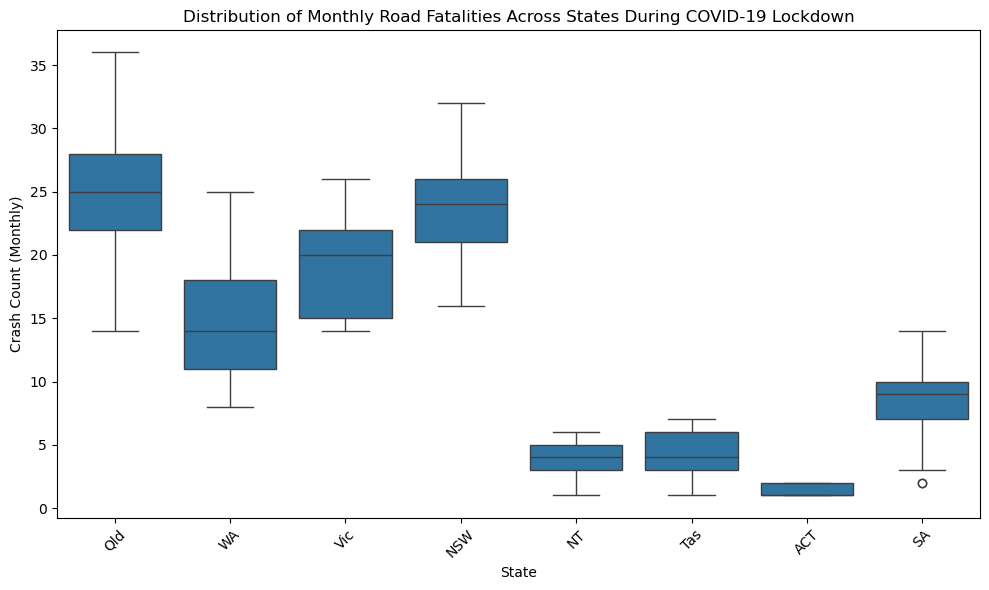

In [12]:
# Set up the visualisations for monthly road fatalities across states
# We will create box plots, time series plots, bar charts, and heatmaps

# Box plot for distribution of monthly road fatalities across states
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Crash Count', data=covid_lockdown_data)
plt.title('Distribution of Monthly Road Fatalities Across States During COVID-19 Lockdown')
plt.xlabel('State')
plt.ylabel('Crash Count (Monthly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


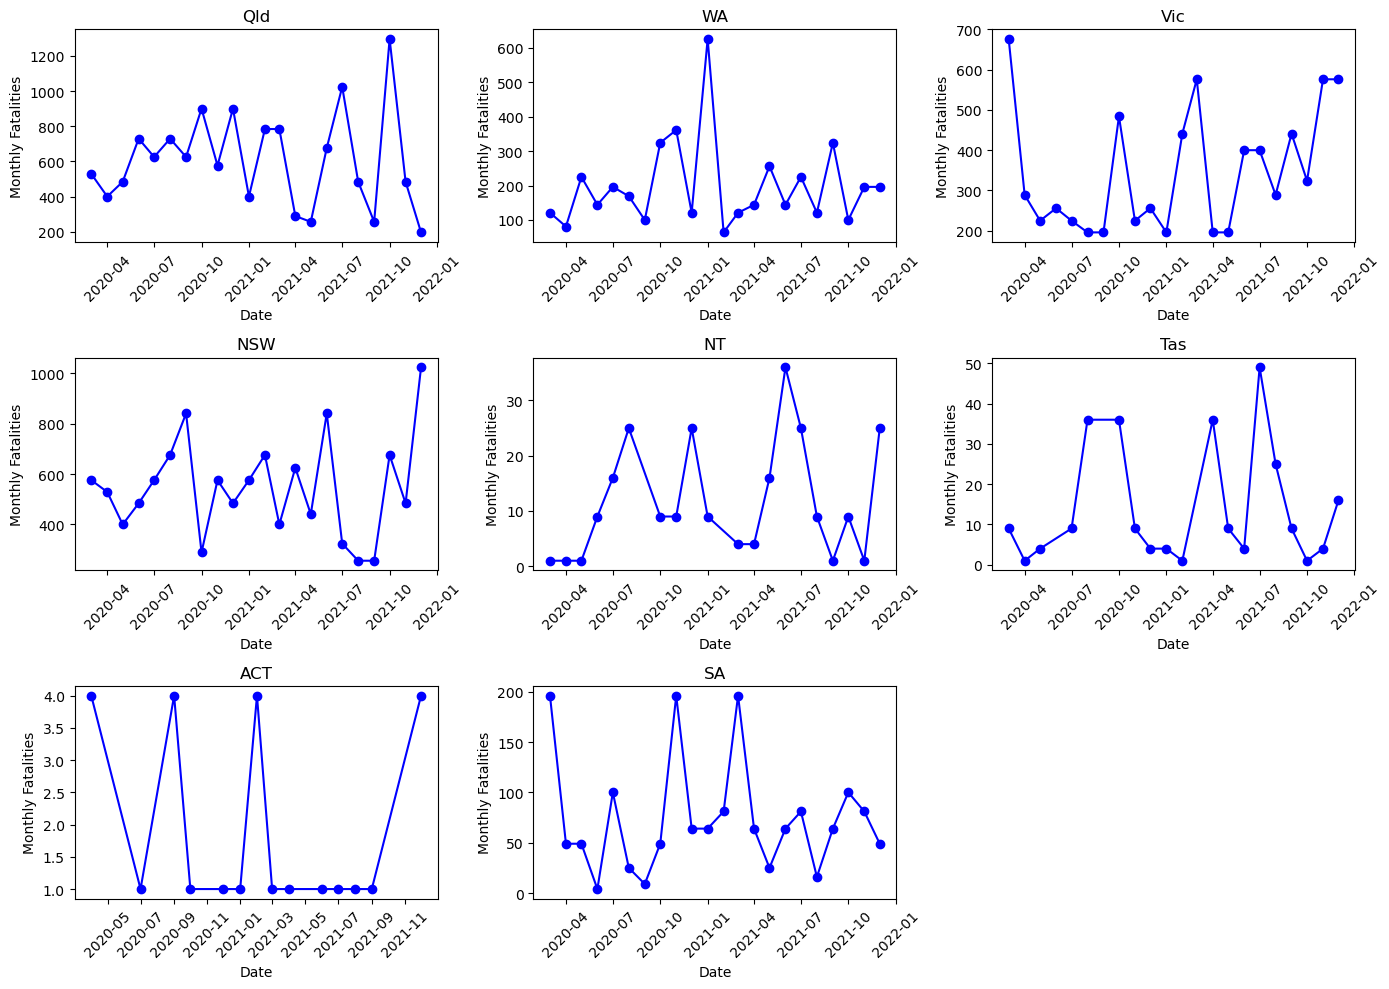

In [13]:
# To improve clarity, let's create separate subplots for each state in the time series plot

# First, extract the relevant columns for plotting and group data by month and year for each state
states = covid_lockdown_data['State'].unique()

plt.figure(figsize=(14, 10))

# Loop through each state and create a subplot for each
for i, state in enumerate(states, start=1):
    state_data = covid_lockdown_data[covid_lockdown_data['State'] == state]
    monthly_totals = state_data.groupby(['Year', 'Month'])['Crash Count'].sum().reset_index()
    monthly_totals['Date'] = pd.to_datetime(monthly_totals[['Year', 'Month']].assign(DAY=1))
    
    plt.subplot(3, 3, i)
    plt.plot(monthly_totals['Date'], monthly_totals['Crash Count'], label=state, color='b', marker='o')
    plt.title(f'{state}')
    plt.xlabel('Date')
    plt.ylabel('Monthly Fatalities')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
